# Промежуточная аттестация 1: 
# ---------- Задание 1 -----------------
## Анализ тональности отзывов на фильмы IMDB

выполнил: Nasonov M, 2022-07-15

=====================================================================

Набор данных IMDb movie review создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта IMDb. Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:

Набор данных для обучения - 25 тыс. отзывов
Набор данных для тестирования - 25 тыс. отзывов
Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:

0 - отзыв отрицательный
1 - отзыв положительный
С точки зрения машинного обучения это задача бинарной классификации.

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [4]:
x_train[3]

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


In [5]:
y_train[3]

1

### Раскодируем текст рецензии

В наборе данных IMDB используется частотное кодирование слов. Загрузим словарь, который использовался для кодирования.

In [6]:
word_index = imdb.get_word_index()

In [7]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Преобразуем словарь, чтобы по номеру получать слово

In [8]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

Печатаем 20 самых частых слов

In [9]:
for i in range(1, 21):
    print(i, '->', reverse_word_index[i])

1 -> the
2 -> and
3 -> a
4 -> of
5 -> to
6 -> is
7 -> br
8 -> in
9 -> it
10 -> i
11 -> this
12 -> that
13 -> was
14 -> as
15 -> for
16 -> with
17 -> movie
18 -> but
19 -> film
20 -> on


### Раскодируем сообщения

Служебные коды:
0 - символ заполнитель
1 - начало последовательности
2 - неизвестное слово

In [10]:
index = 3
message = ''
for code in x_train[index]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

In [11]:
y_train[index]

1

### Подготовка данных для обучения

In [12]:
maxlen = 200

In [13]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [14]:
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [15]:
y_train[3]

1

### Создание нейронной сети

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### Обучаем нейронную сеть

In [18]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 1s 2ms/step - loss: 96.4106 - accuracy: 0.5019 - val_loss: 31.8780 - val_accuracy: 0.5424
Epoch 2/25
176/176 [==============================] - 0s 2ms/step - loss: 16.5539 - accuracy: 0.5280 - val_loss: 6.8574 - val_accuracy: 0.5212
Epoch 3/25
176/176 [==============================] - 0s 1ms/step - loss: 5.5867 - accuracy: 0.5211 - val_loss: 4.0997 - val_accuracy: 0.5212
Epoch 4/25
176/176 [==============================] - 0s 1ms/step - loss: 5.8164 - accuracy: 0.5218 - val_loss: 5.0364 - val_accuracy: 0.5100
Epoch 5/25
176/176 [==============================] - 0s 2ms/step - loss: 3.7476 - accuracy: 0.5328 - val_loss: 4.4236 - val_accuracy: 0.5176
Epoch 6/25
176/176 [==============================] - 0s 2ms/step - loss: 3.2765 - accuracy: 0.5296 - val_loss: 2.7848 - val_accuracy: 0.4980
Epoch 7/25
176/176 [==============================] - 0s 1ms/step - loss: 2.5527 - accuracy: 0.5352 - val_loss: 2.8347 - val_accuracy: 0.5116
Epo

In [19]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


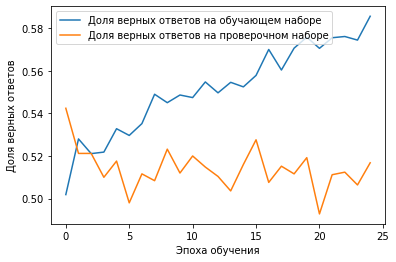

In [20]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Проверяем работу сети на тестовом наборе данных

In [21]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 1s 862us/step - loss: 1.8044 - accuracy: 0.5056


In [22]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 50.556


## Представление текста в формате one hot encoding для определения тональности отзывов на фильмы из IMDB

Функция для кодирования one hot encoding

In [23]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [24]:
x_train = vectorize_sequences(x_train, max_words)
x_test = vectorize_sequences(x_test, max_words)

In [25]:
x_train[0][:50]

array([0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])

In [26]:
len(x_train[0])

10000

In [27]:
y_train[0]

1

### Создание нейронной сети

In [28]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### Обучаем нейронную сеть

In [30]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 2s 11ms/step - loss: 0.3509 - accuracy: 0.8475 - val_loss: 0.2964 - val_accuracy: 0.8784
Epoch 2/10
176/176 [==============================] - 2s 10ms/step - loss: 0.1777 - accuracy: 0.9311 - val_loss: 0.3205 - val_accuracy: 0.8740
Epoch 3/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0869 - accuracy: 0.9703 - val_loss: 0.4253 - val_accuracy: 0.8700
Epoch 4/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0234 - accuracy: 0.9938 - val_loss: 0.5649 - val_accuracy: 0.8720
Epoch 5/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.6708 - val_accuracy: 0.8748
Epoch 6/10
176/176 [==============================] - 2s 10ms/step - loss: 7.1586e-04 - accuracy: 1.0000 - val_loss: 0.7523 - val_accuracy: 0.8732
Epoch 7/10
176/176 [==============================] - 2s 10ms/step - loss: 2.6961e-04 - accuracy: 1.0000 - val_loss: 0.8078 - val_accuracy

In [31]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


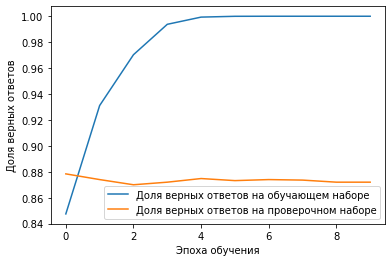

In [32]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Проверяем работу сети на тестовом наборе данных

In [33]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.9896 - accuracy: 0.8540


In [34]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 85.404


## Плотное векторное представление слов для определения тональности текста отзывов на фильмы из IMDB

In [35]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout

### Подготовка данных для обучения

In [36]:
max_words=10000

In [37]:
maxlen = 200

In [38]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [39]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [40]:
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [41]:
y_train[3]

1

### Создание нейронной сети

In [42]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 2)            20000     
                                                                 
 dropout (Dropout)           (None, 200, 2)            0         
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 401       
                                                                 
Total params: 20,401
Trainable params: 20,401
Non-trainable params: 0
_________________________________________________________________


### Обучаем нейронную сеть

In [46]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.5444 - val_loss: 0.6764 - val_accuracy: 0.6360
Epoch 2/15
176/176 [==============================] - 1s 3ms/step - loss: 0.5999 - accuracy: 0.7381 - val_loss: 0.5081 - val_accuracy: 0.7972
Epoch 3/15
176/176 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8387 - val_loss: 0.3882 - val_accuracy: 0.8504
Epoch 4/15
176/176 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8707 - val_loss: 0.3433 - val_accuracy: 0.8596
Epoch 5/15
176/176 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8892 - val_loss: 0.3177 - val_accuracy: 0.8744
Epoch 6/15
176/176 [==============================] - 0s 3ms/step - loss: 0.2607 - accuracy: 0.9028 - val_loss: 0.3031 - val_accuracy: 0.8816
Epoch 7/15
176/176 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9098 - val_loss: 0.2957 - val_accuracy: 0.8844
Epoch 

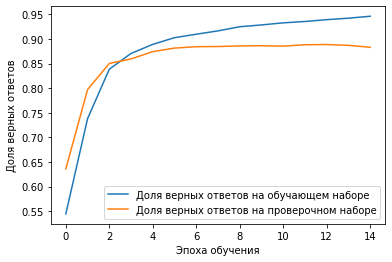

In [47]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Проверяем работу сети на тестовом наборе данных

In [48]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 1s 839us/step - loss: 0.3038 - accuracy: 0.8723


### Исследуем обученное плотное векторное представление слов

Получаем матрицу плотных векторных представлений слов

In [49]:
embedding_matrix = model.layers[0].get_weights()[0]

In [50]:
embedding_matrix[:5]

array([[ 0.01089499, -0.0206446 ],
       [ 0.10068952,  0.12242522],
       [ 0.01484306,  0.03578959],
       [ 0.03648655,  0.00558304],
       [-0.01881065, -0.02532777]], dtype=float32)

Загружаем словарь с номерами слов

In [51]:
word_index_org = imdb.get_word_index()

Дополняем словарь служебными символами

In [52]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3

### Ищем векторы для слов

In [53]:
word = 'good'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 52
Вектор для слова [-0.16977006 -0.1739238 ]


### Сохраняем обученные плотные векторные представления в файл

Составляем реверсивный словарь токенов (слов)

In [54]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

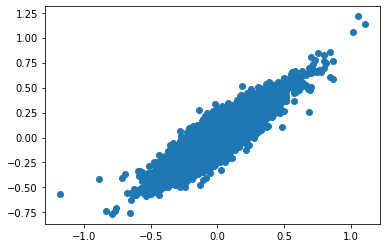

In [56]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

Выбираем коды слов, по которым можно определить тональность отзыва

In [57]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])

Получаем векторное представление интересующих нас слов

In [58]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[-0.53002846, -0.4183933 ],
       [-0.50105673, -0.5644944 ],
       [-0.5328834 , -0.58953875],
       [-0.16977006, -0.1739238 ],
       [ 0.47034088,  0.4112152 ],
       [ 1.0169799 ,  1.0546364 ],
       [ 0.59049934,  0.45311254],
       [ 0.70760536,  0.71828824],
       [ 0.23634562,  0.23326555]], dtype=float32)

Визуализация обученного плотного векторного представления слов, по которым можно определить эмоциональную окраску текста

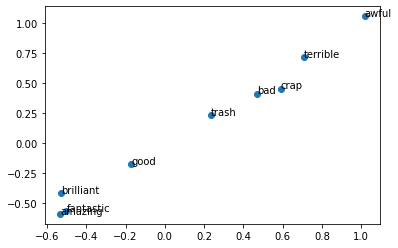

In [59]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))

# -------------- Задание 2 ---------------------
# Анализ отзывов на фильмы с сайта "Кинопоиск.ру"

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [4]:
word_index = imdb.get_word_index()

In [5]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Преобразуем словарь, чтобы по номеру получать слово

In [6]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

Печатаем 20 самых частых слов

In [7]:
for i in range(1, 21):
    print(i, '->', reverse_word_index[i])

1 -> the
2 -> and
3 -> a
4 -> of
5 -> to
6 -> is
7 -> br
8 -> in
9 -> it
10 -> i
11 -> this
12 -> that
13 -> was
14 -> as
15 -> for
16 -> with
17 -> movie
18 -> but
19 -> film
20 -> on


In [8]:
index = 3
message = ''
for code in x_train[index]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

In [9]:
y_train[index]

1

### Подготовка данных для обучения

In [10]:
maxlen = 200

In [11]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [12]:
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [13]:
y_train[3]

1

### Создание нейронной сети

In [14]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# model = Sequential()
# model.add(Embedding(max_words, 8, input_length=maxlen))
# model.add(LSTM(32, recurrent_dropout = 0.2))
# model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________


### Обучаем нейронную сеть

In [17]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 1s 2ms/step - loss: 101.5761 - accuracy: 0.5039 - val_loss: 38.6058 - val_accuracy: 0.5148
Epoch 2/25
176/176 [==============================] - 0s 2ms/step - loss: 21.0864 - accuracy: 0.5341 - val_loss: 13.1867 - val_accuracy: 0.5068
Epoch 3/25
176/176 [==============================] - 0s 2ms/step - loss: 7.5956 - accuracy: 0.5349 - val_loss: 5.4997 - val_accuracy: 0.4984
Epoch 4/25
176/176 [==============================] - 0s 2ms/step - loss: 4.3978 - accuracy: 0.5273 - val_loss: 3.5173 - val_accuracy: 0.5180
Epoch 5/25
176/176 [==============================] - 0s 2ms/step - loss: 3.3186 - accuracy: 0.5303 - val_loss: 2.7789 - val_accuracy: 0.5088
Epoch 6/25
176/176 [==============================] - 0s 2ms/step - loss: 2.4513 - accuracy: 0.5412 - val_loss: 2.6837 - val_accuracy: 0.4880
Epoch 7/25
176/176 [==============================] - 0s 1ms/step - loss: 2.1159 - accuracy: 0.5380 - val_loss: 3.9500 - val_accuracy: 0.5112
E

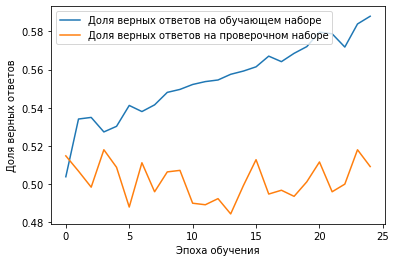

In [18]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Проверяем работу сети на тестовом наборе данных

In [19]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 1s 879us/step - loss: 2.2228 - accuracy: 0.5011


In [20]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 50.112


In [21]:
sentence = "Wow this is a great movie I have ever seen. I would recommend it to everyone. Super actors as well!"

def vectorize_text(sentence):
  encoded = []

  for word in sentence.split():
    
    if word in word_index.keys():
      encoded.append(word_index[word])
    else:
      encoded.append(2)
  return encoded

print(vectorize_text(sentence))

[2, 11, 6, 3, 84, 17, 2, 25, 123, 2, 2, 59, 383, 9, 5, 2, 2, 153, 14, 2]


In [22]:
text_encoding = vectorize_text(""" Jaws" by Steven Spielberg went down in history as the first blockbuster, but even then, in the 1970s, such a feature emerged that the continuation of the movie bombs turned out to be many times worse than the original when they tried to cash in on the glory of their predecessor. And on the example of Jaws, this sad trend is most clearly manifested, because the second part turned out to be no. It seems to have the same meaning, but everything is already perceived with indifference. A triquel is a completely separate conversation. The 3D format is what ruined the film at the development stage. Even in our time, films that can be viewed in 3D are very surprising, and in the eighties such a marketing ploy worked flawlessly. And apparently, director Joe Elwes decided that only one three-dimensional image would be enough for the audience, therefore, among other things, only one thing needs to be added to the film - entertainment. This became the main principle when creating "Jaws 3D": everywhere as much entertainment as possible! A 7-meter white shark has turned into a real 10-meter megalodon, and events are no longer in the ocean, but in the aquarium. In theory, it was conceived successfully, but only nothing has progressed beyond the level of the idea. It makes you want to throw rotten tomatoes at the screen for a lazily assembled shark. Where did the well-made layout from the first part go? For unreliable movements and the appearance of a shark, the third Jaws have not yet been defeated only by the laziest critic. I also want to throw something spoiled into the faces of all the characters appearing on the screen. The charisma of Sheriff Brody, student Cooper and fisherman Quint does not smell here. It's not that any of the cast in the third film is very annoying, but when all the characters think and behave in the same way, it looks terribly primitive. In addition, in this film, the shark attack on people is very indifferent. One can, of course, understand that one of us, the destroyers of nature, deserves such a fate, but not to the same extent as to rejoice because a dolphin survives. But what really killed the third movie was the hacky special effects. Torn off fish heads and human hands, a bathyscaphe floating in the water column - everything looks indescribably miserable, created somehow, if only it was done at all. The apogee of this ignorance is the scene with a shark swimming towards the glass of an underwater tower. Someone is outraged that in these frames the shark does not move its fins, but in reality the fish does not swim at all: it is clearly visible that an enlarged image was simply superimposed on the background of the ocean. And this is with a budget of 20 million dollars! For comparison: the cost of "Alien" was half as much, but there is much more realism. This movie is without hesitation one of the most mediocre sequels of all time. It's even more absurd than Jaws 4. Why, even the Italian "Cruel Jaws" of 1995 """) 

In [23]:
x_val = pad_sequences(np.array(text_encoding).reshape(1,-1), maxlen=maxlen, padding='post')
print(x_val)

[[ 1902     2     2     2     8    11     2     1  3307  1271    20    81
      6    52     2     2     2     4     2   388    12    28     4     2
      1 33963     4     2  1012   138     3     2    18    21     5     1
    169  2823    14     5 18206    85     3 26671     2     2    48    63
    553     1   837    17    13     1     2   315     2     2   122  3105
   1825     2   403     2     3     2  4690     8     1  1090 14767     2
    282   269 19813     2  1072     2    45    61     9    13   221    30
      2     2 45712     4    11  5482     6     1   133    16     3  3307
   4416   946     1  3059     4    32  6351     2     2     6 12733    12
      8   131  5870     1  3307   124    21   844    91     2    18     8
    632     1  3105   124    21  5013    30     2     9     6   692  4684
     12    32 29445  1456    13   328 14125    20     1   975     4     1
      2     2    11     6    16     3   349     4   888  1428     2     2
      2     1  2319     4     2    13 

In [24]:
model.predict(x_val)

array([[9.603382e-06]], dtype=float32)

In [25]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(LSTM(32, recurrent_dropout = 0.2))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 8)            80000     
                                                                 
 lstm (LSTM)                 (None, 32)                5248      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 85,281
Trainable params: 85,281
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=8,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/8
176/176 [==============================] - 21s 110ms/step - loss: 0.6265 - accuracy: 0.6131 - val_loss: 0.4799 - val_accuracy: 0.8248
Epoch 2/8
176/176 [==============================] - 19s 106ms/step - loss: 0.3349 - accuracy: 0.8690 - val_loss: 0.3177 - val_accuracy: 0.8752
Epoch 3/8
176/176 [==============================] - 19s 108ms/step - loss: 0.2511 - accuracy: 0.9106 - val_loss: 0.3236 - val_accuracy: 0.8600
Epoch 4/8
176/176 [==============================] - 18s 103ms/step - loss: 0.2034 - accuracy: 0.9317 - val_loss: 0.2983 - val_accuracy: 0.8808
Epoch 5/8
176/176 [==============================] - 18s 104ms/step - loss: 0.1735 - accuracy: 0.9443 - val_loss: 0.3152 - val_accuracy: 0.8700
Epoch 6/8
176/176 [==============================] - 18s 103ms/step - loss: 0.1454 - accuracy: 0.9542 - val_loss: 0.3518 - val_accuracy: 0.8780
Epoch 7/8
176/176 [==============================] - 18s 103ms/step - loss: 0.1337 - accuracy: 0.9596 - val_loss: 0.3318 - val_accuracy:

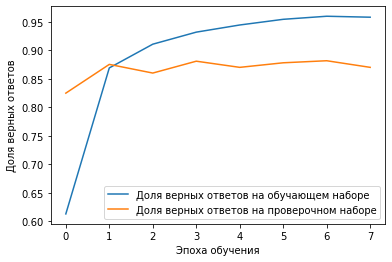

In [29]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Проверяем работу сети

In [30]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 7s 9ms/step - loss: 0.4382 - accuracy: 0.8520


In [31]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 85.204


### Используем отзыв 1 с сайта "Кинопоиск"
https://www.kinopoisk.ru/film/1387021/reviews/?ord=rating&status=good

"My viewing began immediately after the release of the film. It was a great four hours. The running time may be intimidating to the unprepared viewer, but it's worth it, including for those who have seen the theatrical version and are disappointed. The film returned to its original plot, which began with Batman v Superman, including deleted scenes that can be seen in the director's cut. Important details for the story, cruelly rejected, Snyderkat returns and the story becomes whole. It's still a story about heroes uniting to protect the Earth from invasion, but then everything makes sense, the appearance of the Flash in Batman v Superman, the storyline with an apocalyptic future, the story goes in its direction set earlier. I was pleased with what I saw. Four hours flew by unnoticed, leaving behind good impressions. Viewing is recommended. The real Justice League in its original form. Thanks to Snyder for coming back for this film. To the fans for persistently getting their way. And I want to believe that one day we will see the end of this story."

In [32]:
sentence1 = "My viewing began immediately after the release of the film. It was a great four hours. The running time may be intimidating to the unprepared viewer, but it's worth it, including for those who have seen the theatrical version and are disappointed. The film returned to its original plot, which began with Batman v Superman, including deleted scenes that can be seen in the director's cut. Important details for the story, cruelly rejected, Snyderkat returns and the story becomes whole. It's still a story about heroes uniting to protect the Earth from invasion, but then everything makes sense, the appearance of the Flash in Batman v Superman, the storyline with an apocalyptic future, the story goes in its direction set earlier. I was pleased with what I saw. Four hours flew by unnoticed, leaving behind good impressions. Viewing is recommended. The real Justice League in its original form. Thanks to Snyder for coming back for this film. To the fans for persistently getting their way. And I want to believe that one day we will see the end of this story."

In [33]:
def vectorize_text(sentence1):
    encoded = []
    
    for word in sentence1.split():
        
        if word in word_index.keys():
            encoded.append(word_index[word])
        else:
            encoded.append(2)
    return encoded

In [34]:
text_encoding = vectorize_text(sentence1)

In [35]:
print(vectorize_text(sentence1))

[2, 826, 1692, 1238, 100, 1, 763, 4, 1, 2, 2, 13, 3, 84, 686, 2, 2, 617, 55, 200, 27, 11346, 5, 1, 19018, 2, 18, 42, 287, 2, 584, 15, 145, 34, 25, 107, 1, 2250, 307, 2, 23, 2, 2, 19, 3779, 5, 91, 201, 2, 60, 1692, 16, 2, 1961, 2, 584, 5542, 136, 12, 67, 27, 107, 8, 1, 2027, 2, 2, 1370, 15, 1, 2, 18703, 2, 2, 1744, 2, 1, 62, 458, 2, 2, 128, 3, 62, 41, 1734, 28731, 5, 2907, 1, 2, 36, 2, 18, 92, 282, 163, 2, 1, 1264, 4, 1, 2, 8, 2, 1961, 2, 1, 766, 16, 32, 7353, 2, 1, 62, 268, 8, 91, 455, 267, 2, 2, 13, 3518, 16, 48, 2, 2, 2, 631, 8751, 31, 2, 1197, 493, 49, 2, 2, 6, 2, 2, 144, 2, 2, 8, 91, 201, 2, 2, 5, 2, 15, 579, 142, 15, 11, 2, 2, 1, 448, 15, 30636, 394, 65, 2, 2, 2, 178, 5, 261, 12, 28, 248, 72, 77, 64, 1, 127, 4, 11, 2]


In [36]:
x_val = pad_sequences(np.array(text_encoding).reshape(1,-1), maxlen=maxlen, padding='post')
print(x_val)

[[    2   826  1692  1238   100     1   763     4     1     2     2    13
      3    84   686     2     2   617    55   200    27 11346     5     1
  19018     2    18    42   287     2   584    15   145    34    25   107
      1  2250   307     2    23     2     2    19  3779     5    91   201
      2    60  1692    16     2  1961     2   584  5542   136    12    67
     27   107     8     1  2027     2     2  1370    15     1     2 18703
      2     2  1744     2     1    62   458     2     2   128     3    62
     41  1734 28731     5  2907     1     2    36     2    18    92   282
    163     2     1  1264     4     1     2     8     2  1961     2     1
    766    16    32  7353     2     1    62   268     8    91   455   267
      2     2    13  3518    16    48     2     2     2   631  8751    31
      2  1197   493    49     2     2     6     2     2   144     2     2
      8    91   201     2     2     5     2    15   579   142    15    11
      2     2     1   448    15 30636 

метод predict не работает (не разбирался почему), суть метода изложена в документации, аргуметы описаны:

https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

будет время - поразбираемся потом. Функция на Гитхабе тоже есть:
https://github.com/keras-team/keras/blob/v2.9.0/keras/engine/training.py#L1869-L2064

In [41]:
model.predict(x_val)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/embedding/embedding_lookup' defined at (most recent call last):
    File "C:\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-37-fcbfa013f722>", line 1, in <module>
      model.predict(x_val)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\layers\embeddings.py", line 197, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1/embedding/embedding_lookup'
indices[0,21] = 11346 is not in [0, 10000)
	 [[{{node sequential_1/embedding/embedding_lookup}}]] [Op:__inference_predict_function_37883]

In [42]:
y_test[-3:-1]

array([0, 0], dtype=int64)

In [43]:
x_test[-3:-1]

array([[   1,   13, 1408,   15,    8,  135,   14,    9,   35,   32,   46,
         394,   20,   62,   30, 5093,   21,   45,  184,   78,    4, 1492,
         910,  769, 2290, 2515,  395, 4257,    5, 1454,   11,  119,    2,
          89, 1036,    4,  116,  218,   78,   21,  407,  100,   30,  128,
         262,   15,    7,  185, 2280,  284, 1842,    2,   37,  315,    4,
         226,   20,  272, 2942,   40,   29,  152,   60,  181,    8,   30,
          50,  553,  362,   80,  119,   12,   21,  846, 5518,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [44]:
message = ''
for code in x_test[-2]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? in love 2 is the third movie it seemed that its creators took elements from the first two to make this one at the risk of giving out spoilers is kidnapped and the team has to get him back nothing new there a past love of is the bad guy that was done in the second movie the battle between and ? and is starting to get boring the movie has almost no action scenes in it and very little comedy i personally don't know what it's makers were thinking i gave this movie a vote of 4 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? "

### Используем отзыв 2 с сайта "Кинопоиск"

It's hard to call this movie a thriller. There is no suspense or intrigue here, and the shark attacks people, but still, it did not produce an atmosphere of some kind of horror or threat on me. People here seem to be trying to kill a shark according to the plot, but it all looks boring and trivial, there are no brilliant ideas here, there is no particular danger to people. There is a lot of talk and unnecessary chatter. Especially at the end, when the trio go to sea, I wait for them to start attacking the shark, and they chatter and chatter about this and that, and this is not interesting dialogue at all, but boring chatter. Don't call it horror either. I don’t argue, the shark really turned out to be scary and in those moments when it appeared it was really creepy, but otherwise, since it appeared most often only with a fin, it was again mostly boring. Conclusion: the film turned out to be boring, uninteresting, not a bit scary.

In [45]:
sentence2 = "It's hard to call this movie a thriller. There is no suspense or intrigue here, and the shark attacks people, but still, it did not produce an atmosphere of some kind of horror or threat on me. People here seem to be trying to kill a shark according to the plot, but it all looks boring and trivial, there are no brilliant ideas here, there is no particular danger to people. There is a lot of talk and unnecessary chatter. Especially at the end, when the trio go to sea, I wait for them to start attacking the shark, and they chatter and chatter about this and that, and this is not interesting dialogue at all, but boring chatter. Don't call it horror either. I don’t argue, the shark really turned out to be scary and in those moments when it appeared it was really creepy, but otherwise, since it appeared most often only with a fin, it was again mostly boring. Conclusion: the film turned out to be boring, uninteresting, not a bit scary."

In [46]:
def vectorize_text(sentence2):
    encoded = []
    
    for word in sentence2.split():
        
        if word in word_index.keys():
            encoded.append(word_index[word])
        else:
            encoded.append(2)
    return encoded

In [47]:
print(vectorize_text(sentence2))

[2, 251, 5, 680, 11, 17, 3, 2, 2, 6, 54, 833, 39, 4027, 2, 2, 1, 3307, 3031, 2, 18, 2, 9, 119, 21, 2239, 32, 838, 4, 46, 240, 4, 186, 39, 3839, 20, 2, 2, 130, 303, 5, 27, 266, 5, 513, 3, 3307, 1790, 5, 1, 2, 18, 9, 29, 269, 354, 2, 2, 47, 23, 54, 527, 1005, 2, 47, 6, 54, 840, 2379, 5, 2, 2, 6, 3, 173, 4, 737, 2, 1741, 2, 2, 30, 1, 2, 51, 1, 3990, 137, 5, 2, 2, 855, 15, 95, 5, 377, 6586, 1, 2, 2, 33, 15704, 2, 15704, 41, 11, 2, 2, 2, 11, 6, 21, 218, 411, 30, 2, 18, 354, 2, 2, 680, 9, 186, 2, 2, 2, 2, 1, 3307, 63, 676, 43, 5, 27, 626, 2, 8, 145, 385, 51, 9, 1479, 9, 13, 63, 2, 18, 2, 234, 9, 1479, 88, 397, 61, 16, 3, 2, 9, 13, 171, 666, 2, 2, 1, 19, 676, 43, 5, 27, 2, 2, 21, 3, 224, 2]


In [48]:
y_test[-3:-1]

array([0, 0], dtype=int64)

In [49]:
x_test[-3:-1]

array([[   1,   13, 1408,   15,    8,  135,   14,    9,   35,   32,   46,
         394,   20,   62,   30, 5093,   21,   45,  184,   78,    4, 1492,
         910,  769, 2290, 2515,  395, 4257,    5, 1454,   11,  119,    2,
          89, 1036,    4,  116,  218,   78,   21,  407,  100,   30,  128,
         262,   15,    7,  185, 2280,  284, 1842,    2,   37,  315,    4,
         226,   20,  272, 2942,   40,   29,  152,   60,  181,    8,   30,
          50,  553,  362,   80,  119,   12,   21,  846, 5518,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

метод predict не работает (не разбирался почему), суть метода изложена в документации, аргуметы описаны:

https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

будет время - поразбираемся потом. Функция на Гитхабе тоже есть:
https://github.com/keras-team/keras/blob/v2.9.0/keras/engine/training.py#L1869-L2064

In [50]:
model.predict(x_val)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/embedding/embedding_lookup' defined at (most recent call last):
    File "C:\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-37-fcbfa013f722>", line 1, in <module>
      model.predict(x_val)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\layers\embeddings.py", line 197, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1/embedding/embedding_lookup'
indices[0,21] = 11346 is not in [0, 10000)
	 [[{{node sequential_1/embedding/embedding_lookup}}]] [Op:__inference_predict_function_37883]

In [51]:
text_encoding = vectorize_text(""" Actors in it played little-known. Playing the roles of bandits and murderers, they overplayed it completely, a couple of times it was even funny. The main role is played by Lou Diamond Phillips, who was often seen in action films and science fiction. He's always good for these roles. The duet was composed by Christy Swanson. She had a promising acting future after Flowers in the Attic, but her career as an actress did not work out. """)

In [52]:
x_val = pad_sequences(np.array(text_encoding).reshape(1,-1), maxlen=maxlen, padding='post')
print(x_val)

[[    2     8     9   253     2     2     1   552     4 15204     2     2
     33 12635     9     2     3   375     4   208     9    13    57     2
      2   290   214     6   253    31     2     2     2    34    13   397
    107     8   203   105     2  1064     2     2   207    49    15   131
      2     2 12106    13  3943    31     2     2     2    66     3  2425
    113   702   100     2     8     1     2    18    38   608    14    32
    521   119    21   154     2     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [53]:
model.predict(x_val)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/embedding/embedding_lookup' defined at (most recent call last):
    File "C:\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-37-fcbfa013f722>", line 1, in <module>
      model.predict(x_val)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\layers\embeddings.py", line 197, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1/embedding/embedding_lookup'
indices[0,9] = 15204 is not in [0, 10000)
	 [[{{node sequential_1/embedding/embedding_lookup}}]] [Op:__inference_predict_function_37883]

In [54]:
message = ''
for code in x_test[-2]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? in love 2 is the third movie it seemed that its creators took elements from the first two to make this one at the risk of giving out spoilers is kidnapped and the team has to get him back nothing new there a past love of is the bad guy that was done in the second movie the battle between and ? and is starting to get boring the movie has almost no action scenes in it and very little comedy i personally don't know what it's makers were thinking i gave this movie a vote of 4 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? "

# -------------- Задание 3 ----------------
# Тестирование модели на тестовом примере

## Упражнение: многоклассовая классификация по вопросам Stack Overflow

В этом руководстве показано, как с нуля обучить двоичный классификатор на наборе данных IMDB. Вы должны изменить эту записную книжку, чтобы обучить многоклассовый классификатор прогнозировать тег вопроса по программированию в Stack Overflow .

Для вас подготовлен набор данных , содержащий несколько тысяч вопросов по программированию (например, «Как мне отсортировать словарь по значению в Python?»), размещенных в Stack Overflow. Каждый из них помечен ровно одним тегом (Python, CSharp, JavaScript или Java). Ваша задача — принять вопрос в качестве входных данных и предсказать соответствующий тег, в данном случае Python.

Набор данных, с которым вы будете работать, содержит несколько тысяч вопросов, извлеченных из гораздо более крупного общедоступного набора данных Stack Overflow в BigQuery , который содержит более 17 миллионов сообщений.

После загрузки набора данных вы обнаружите, что структура каталогов аналогична набору данных IMDB, с которым вы работали ранее:

train/
...python/
......0.txt
......1.txt
...javascript/
......0.txt
......1.txt
...csharp/
......0.txt
......1.txt
...java/
......0.txt
......1.txt
Чтобы выполнить это упражнение, вы должны изменить эту записную книжку для работы с набором данных Stack Overflow, внеся следующие изменения:

В верхней части записной книжки обновите код, который загружает набор данных IMDB, на код для загрузки уже подготовленного набора данных Stack Overflow . Поскольку набор данных Stack Overflow имеет аналогичную структуру каталогов, вам не потребуется вносить много изменений.

Измените последний слой вашей модели на Dense(4) , так как теперь есть четыре выходных класса.

При компиляции модели измените потери на tf.keras.losses.SparseCategoricalCrossentropy . Это правильная функция потерь для использования в задаче классификации нескольких классов, когда метки для каждого класса являются целыми числами (в данном случае они могут быть 0, 1 , 2 или 3 ). Кроме того, измените метрику на metrics=['accuracy'] , так как это проблема классификации нескольких классов ( tf.metrics.BinaryAccuracy используется только для бинарных классификаторов).

Как только эти изменения будут завершены, вы сможете обучить модель.

Протестируйте Вашу модель на следующем примере "How can I read a text file in Python?"

In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [2]:
print(tf.__version__)

2.8.0


### Sentiment analysis

Это задание обучает модель анализа настроений классифицировать отзывы о фильмах как положительные или отрицательные на основе текста обзора. Это пример бинарной — или двухклассовой — классификации, важной и широко применимой проблемы машинного обучения.

Вы будете использовать большой набор данных обзоров фильмов , который содержит текст 50 000 обзоров фильмов из базы данных фильмов в Интернете . Они разделены на 25 000 отзывов для обучения и 25 000 отзывов для тестирования. Наборы для обучения и тестирования сбалансированы , то есть содержат равное количество положительных и отрицательных отзывов.

####  Загрузите и изучите набор данных IMDB
Давайте загрузим и извлечем набор данных, а затем изучим структуру каталогов.

In [3]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset = tf.keras.utils.get_file("stack_overflow_16k", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), '.')

In [4]:
dataset_dir = os.path.join(os.path.dirname(dataset), '.')

In [5]:
os.listdir(dataset_dir)

['.ipynb_checkpoints',
 'aclImdb',
 'aclImdb_v1.tar.gz',
 'imdb_embeddings.csv',
 'main_directory',
 'pa_NasonovM_v01.ipynb',
 'pa_NasonovM_v02.ipynb',
 'README.md',
 'stack_overflow_16k.tar.gz',
 'test',
 'train']

In [6]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['csharp', 'java', 'javascript', 'python']

aclImdb/train/pos и aclImdb/train/neg содержат множество текстовых файлов, каждый из которых представляет собой отдельный обзор фильма. Давайте взглянем на один из них.

In [7]:
sample_file = os.path.join(train_dir, 'python/1230.txt')
with open(sample_file) as f:
  print(f.read())

"pandas dataframe assign 0 with all the value after first non-nan value i have a dataframe with several columns and a series whose value are the index of the first non-nan value of the dataframe:..dataframe x:..    a    b    c    d    e     f    g    h .1   nan  nan  2    nan  nan  nan  nan  nan.2   nan  2    nan  10   23   nan  nan  nan.3   3    nan  23   42   232  3    nan  5...series y:..a   3.b   2.c   1.d   2.e   2.f   3.g   nan.h   3...now i want to assign 0 with all the value after first non-nan value(include the first non-nan value) by the value of series(whose value are the index of the first non-nan value of the dataframe x)..result is..    a    b    c    d    e     f    g    h .1   nan  nan  0    nan  nan  nan  nan  nan.2   nan  0    0    0    0    nan  nan  nan.3   0    0    0    0    0    0    nan  0...i use applymap to deal with it,but applymap seems not to deal with index information,here is my code:..def mycode(x,y).if x.index&lt;=y:.        return 0.    else:.        r

In [8]:
sample_file = os.path.join(train_dir, 'python/1010.txt')
with open(sample_file) as f:
  print(f.read())

"link lists inside function in blank i am trying to to connect the element of my lists in the function in way if i do any change on any element of ..def itinerant(s1,s2,s3,s4,s5,s6,s7,s8):.    old_list=[s1,s2,s3,s4,s5,s6,s7,s8].    outer=[s5,s6,s7,s8].    outer_cube=[[s2,s3,s4],[s1,s3,s4],[s1,s2,s4],[s1,s2,s3]]...so for example if i make change on any of s3s on outer_cube in the 'outer_cube' list this change goes to the rest of s3s in this list and s3 'old_list' as well .my function returns.    new_list=[s1,s2,s3,s4,s5,s6,s7,s8] .with the updated elements.any suggestions would be appreciated."



Загрузите набор данных
Далее вы загрузите данные с диска и подготовите их в формат, подходящий для обучения. Для этого вы будете использовать полезную утилиту text_dataset_from_directory , которая ожидает следующую структуру каталогов.

main_directory/
...class_a/
......a_text_1.txt
......a_text_2.txt
...class_b/
......b_text_1.txt
......b_text_2.txt
Чтобы подготовить набор данных для бинарной классификации, вам понадобятся две папки на диске, соответствующие class_a и class_b . Это будут положительные и отрицательные отзывы о фильмах, которые можно найти в aclImdb/train/pos и aclImdb/train/neg . Поскольку набор данных IMDB содержит дополнительные папки, вы удалите их перед использованием этой утилиты.

Далее вы будете использовать утилиту text_dataset_from_directory для создания помеченного tf.data.Dataset . tf.data — мощный набор инструментов для работы с данными.

При проведении эксперимента по машинному обучению рекомендуется разделить набор данных на три части: обучение , проверка и тестирование .

Набор данных IMDB уже разделен на обучающий и тестовый, но в нем отсутствует проверочный набор. Давайте создадим проверочный набор, используя разделение обучающих данных 80:20, используя приведенный ниже аргумент validation_split .

In [9]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [10]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the default constru

Обратите внимание, что обзоры содержат необработанный текст (со знаками препинания и случайными HTML-тегами, такими как
). Вы покажете, как обращаться с ними в следующем разделе.

Метки — 0 или 1. Чтобы увидеть, какие из них соответствуют положительным и отрицательным отзывам о фильмах, вы можете проверить свойство class_names в наборе данных.

In [11]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to csharp
Label 1 corresponds to java


Далее вы создадите набор данных для проверки и тестирования. Вы будете использовать оставшиеся 5000 отзывов из обучающего набора для проверки.

In [12]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [13]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'test', 
    batch_size=batch_size)

Found 8000 files belonging to 4 classes.


### Подготовьте набор данных для обучения

In [14]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [15]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [16]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [17]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [18]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'"set blank to quit on exception? i\'m using blank 3..i\'ve been looking around for an answer to this, but i haven\'t found it yet. basically, i\'m running several blank scripts into a game engine, and each script has its own entry point...i\'d rather not add try: except blocks through all of my code, so i was wondering if it\'s at all possible to tell blank to quit (or perhaps assign a custom function to that ""callback"") on finding its first error, regardless of where or what it found? ..currently, the game engine will continue after finding and hitting an error, making it more difficult than necessary to diagnose issues since running into one error may make a subsequent script not work (as it relies on variables that the error-ing script set, for example). any ideas? ..i know that i could redirect the console to a file to allow for easier scrolling, but just capturing the first error and stopping the game prematurely would be really useful...okay, a couple of extr

In [19]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  saw
 313 --->  source
Vocabulary size: 10000


In [20]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

### Создайте модель

In [21]:
embedding_dim = 16

In [22]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(4)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 4)                 68        
                                                                 
Total params: 160,084
Trainable params: 160,084
Non-trainable params: 0
__________________________________________________

Слои укладываются последовательно для построения классификатора:

Первый слой — это слой Embedding . Этот слой принимает обзоры в целочисленном кодировании и ищет вектор встраивания для каждого индекса слова. Эти векторы изучаются по мере обучения модели. Векторы добавляют измерение к выходному массиву. Результирующие размеры: (batch, sequence, embedding) . Чтобы узнать больше о встраиваниях, см. руководство по встраиванию слов . Затем слой GlobalAveragePooling1D возвращает выходной вектор фиксированной длины для каждого примера путем усреднения по измерению последовательности. Это позволяет модели обрабатывать ввод переменной длины самым простым способом. Этот выходной вектор фиксированной длины передается через полносвязный ( Dense ) слой с 16 скрытыми единицами. Последний слой плотно связан с одним выходным узлом.

### Функция потерь и оптимизатор
Модель нуждается в функции потерь и оптимизаторе для обучения. Поскольку это проблема бинарной классификации, а модель выводит вероятность (одноэлементный слой с сигмовидной активацией), вы будете использовать функцию потерь losses.BinaryCrossentropy .

Теперь настройте модель для использования оптимизатора и функции потерь

In [23]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

### Обучите модель

In [24]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
200/200 [==============================] - 3s 11ms/step - loss: 1.3796 - accuracy: 0.3309 - val_loss: 1.3705 - val_accuracy: 0.5081
Epoch 2/10
200/200 [==============================] - 2s 10ms/step - loss: 1.3548 - accuracy: 0.4475 - val_loss: 1.3363 - val_accuracy: 0.5156
Epoch 3/10
200/200 [==============================] - 2s 11ms/step - loss: 1.3084 - accuracy: 0.5231 - val_loss: 1.2819 - val_accuracy: 0.5706
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 1.2437 - accuracy: 0.5819 - val_loss: 1.2131 - val_accuracy: 0.6056
Epoch 5/10
200/200 [==============================] - 2s 11ms/step - loss: 1.1684 - accuracy: 0.6247 - val_loss: 1.1391 - val_accuracy: 0.6587
Epoch 6/10
200/200 [==============================] - 2s 10ms/step - loss: 1.0934 - accuracy: 0.6711 - val_loss: 1.0656 - val_accuracy: 0.6888
Epoch 7/10
200/200 [==============================] - 2s 10ms/step - loss: 1.0183 - accuracy: 0.7119 - val_loss: 0.9983 - val_accuracy: 0.7212

Оценить модель
Посмотрим, как поведет себя модель. Будет возвращено два значения. Потеря (число, которое представляет нашу ошибку, чем меньше значение, тем лучше) и точность.

In [25]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 [==============================] - 2s 6ms/step - loss: 0.8714 - accuracy: 0.7364
Loss:  0.8714430928230286
Accuracy:  0.7363749742507935


In [28]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

250/250 [==============================] - 2s 7ms/step - loss: 0.8714 - accuracy: 0.7364
0.7363749742507935


In [29]:
examples = [
  "How can I read a text file in Python?",
]

export_model.predict(examples)

array([[0.5142387 , 0.47145945, 0.5284006 , 0.47659153]], dtype=float32)